<a href="https://colab.research.google.com/github/ktaran-jeet/deepVision-ImageClassification/blob/main/LeNet5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LeNet5:

LeNet-5, from the paper Gradient-Based Learning Applied to Document Recognition, is a very efficient convolutional neural network for handwritten character recognition.








In [1]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Data Loading and preprocessing:

In [50]:
import torchvision
from torchvision.transforms import transforms

transform = transforms.Compose([
    transforms.Resize(32),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_data = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_data = torchvision.datasets.MNIST(root='./data', train=False, transform=transform, download=True)

print("Training data samples:",len(train_data))
print("Testing data samples:",len(test_data))

Training data samples: 60000
Testing data samples: 10000


In [51]:
train_loader = torch.utils.data.DataLoader(dataset=train_data, batch_size=64)
test_loader = torch.utils.data.DataLoader(dataset=test_data, batch_size=64)

#Testing input dimensions:
input, label = next(iter(train_loader))
print(input.shape)
print(label.shape)

torch.Size([64, 1, 32, 32])
torch.Size([64])


Architecture:

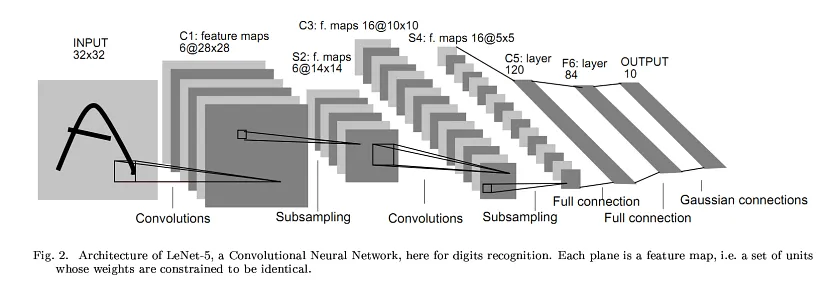

Model implementation:

In [60]:
import torch
import torch.nn as nn

class LeNet5(nn.Module):
    def __init__(self, num_classes=10):
      super(LeNet5, self).__init__()
      self.feature_extractor = nn.Sequential(
        nn.Conv2d(1, 6, kernel_size=5, stride=1, padding=2),
        nn.Tanh(),
        nn.AvgPool2d(kernel_size=2, stride=2),
        nn.Conv2d(6, 16, kernel_size=5, stride=1),
        nn.Tanh(),
        nn.AvgPool2d(kernel_size=2, stride=2),
        nn.Conv2d(16, 120, kernel_size=5, stride=1),
        nn.Tanh(),
        nn.AvgPool2d(kernel_size=2, stride=2)
      )
      self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(120, 84),
        nn.Tanh(),
        nn.Linear(84, num_classes)
      )

    def forward(self, x):
        x = self.feature_extractor(x)
        x = self.classifier(x)
        return x

In [61]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

model = LeNet5(num_classes=10)
model = model.to(device=device)
print(model)

Using device: cuda
LeNet5(
  (feature_extractor): Sequential(
    (0): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): Tanh()
    (2): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): Tanh()
    (5): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (6): Conv2d(16, 120, kernel_size=(5, 5), stride=(1, 1))
    (7): Tanh()
    (8): AvgPool2d(kernel_size=2, stride=2, padding=0)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=120, out_features=84, bias=True)
    (2): Tanh()
    (3): Linear(in_features=84, out_features=10, bias=True)
  )
)


Model Training:

In [63]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [65]:
num_epochs=35

total_train_loss = []

for epoch in range(num_epochs):
  train_loss = 0.0

  model.train()

  for data, target in train_loader:
    data = data.to(device=device)
    target = target.to(device=device)

    optimizer.zero_grad()
    output = model(data)
    loss = criterion(output, target)
    loss.backward()
    optimizer.step()

    train_loss += loss.item()*data.size(0)

  train_loss = train_loss/len(train_loader.dataset)
  total_train_loss.append(train_loss)

  print('Epoch: {} \tTraining Loss: {:.6f}'.format(
        epoch, train_loss))

Epoch: 0 	Training Loss: 0.123904
Epoch: 1 	Training Loss: 0.116493
Epoch: 2 	Training Loss: 0.121575
Epoch: 3 	Training Loss: 0.113431
Epoch: 4 	Training Loss: 0.119622
Epoch: 5 	Training Loss: 0.118856
Epoch: 6 	Training Loss: 0.107133
Epoch: 7 	Training Loss: 0.115465
Epoch: 8 	Training Loss: 0.110912
Epoch: 9 	Training Loss: 0.110883
Epoch: 10 	Training Loss: 0.106260
Epoch: 11 	Training Loss: 0.109839
Epoch: 12 	Training Loss: 0.109367
Epoch: 13 	Training Loss: 0.108733
Epoch: 14 	Training Loss: 0.104246
Epoch: 15 	Training Loss: 0.124874
Epoch: 16 	Training Loss: 0.109237
Epoch: 17 	Training Loss: 0.110424
Epoch: 18 	Training Loss: 0.111194
Epoch: 19 	Training Loss: 0.115900
Epoch: 20 	Training Loss: 0.109327
Epoch: 21 	Training Loss: 0.117062
Epoch: 22 	Training Loss: 0.104164
Epoch: 23 	Training Loss: 0.104354
Epoch: 24 	Training Loss: 0.105458
Epoch: 25 	Training Loss: 0.110218
Epoch: 26 	Training Loss: 0.109792
Epoch: 27 	Training Loss: 0.099566
Epoch: 28 	Training Loss: 0.12

Model Evaluation:

In [66]:
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Test Accuracy: {100 * correct / total:.2f}%")

Test Accuracy: 96.09%


Plots:

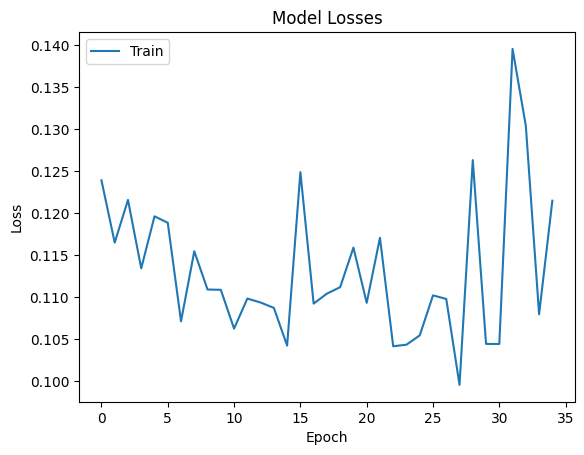

In [67]:
# Plot training accuracy values
plt.plot(total_train_loss, label = 'Training Loss')
plt.title('Model Losses')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()